In [80]:

#Upload shampoo-sales.csv
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving BitcoinDayPrice_April2013-June2018.npy to BitcoinDayPrice_April2013-June2018 (2).npy
User uploaded file "BitcoinDayPrice_April2013-June2018.npy" with length 30368 bytes


# LSTM Network and Data Preprocessing


LSTM for shampoo sales prediction tutorial: 
(https://)https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

Data: https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv


In [0]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
def parser(x):
  return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=10):
  df = DataFrame(data)
  columns = [df.shift(i) for i in range(1, lag+1)]
  columns.append(df)
  df = concat(columns, axis=1)
  df.fillna(0, inplace=True)
  return df

# create a differenced series
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
  return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
  # fit scaler
  scaler = MinMaxScaler(feature_range=(-1, 1))
  scaler = scaler.fit(train)
  # transform train
  train = train.reshape(train.shape[0], train.shape[1])
  train_scaled = scaler.transform(train)
  # transform test
  test = test.reshape(test.shape[0], test.shape[1])
  test_scaled = scaler.transform(test)
  return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
  new_row = [x for x in X] + [value]
  array = numpy.array(new_row)
  array = array.reshape(1, len(array))
  inverted = scaler.inverse_transform(array)
  return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])
  model = Sequential()
  model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  for i in range(nb_epoch):
    model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
    model.reset_states()
    print('Epoch ' + str(i) + ' complete')
  return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
  X = X.reshape(1, 1, len(X))
  yhat = model.predict(X, batch_size=batch_size)
  return yhat[0,0]

# load dataset
series = numpy.load('BitcoinDayPrice_April2013-June2018.npy')
raw_values = series[:,1]

# series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
            
# transform data to be stationary
# raw_values = series.values

diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train_length = int((0.99*supervised_values.shape[0])) #Train on 99% of data
train, test = supervised_values[0:train_length], supervised_values[train_length:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

  

#Train Model

In [0]:
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 500, 1000) #input: scaled training data, batch)size, # epochs, # neurons in hidden layer
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

print("Training complete.")


Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete
Epoch 20 complete
Epoch 21 complete
Epoch 22 complete
Epoch 23 complete
Epoch 24 complete
Epoch 25 complete
Epoch 26 complete
Epoch 27 complete
Epoch 28 complete
Epoch 29 complete
Epoch 30 complete
Epoch 31 complete
Epoch 32 complete
Epoch 33 complete
Epoch 34 complete
Epoch 35 complete
Epoch 36 complete
Epoch 37 complete
Epoch 38 complete
Epoch 39 complete
Epoch 40 complete
Epoch 41 complete
Epoch 42 complete
Epoch 43 complete
Epoch 44 complete
Epoch 45 complete
Epoch 46 complete
Epoch 47 complete
Epoch 48 complete
Epoch 49 complete
Epoch 50 complete
Epoch 51 complete
Epoch 52 complete
Epoch 53 complete
Epoch 54 complete
Epoch 55 complete
Ep

#Predict and Report

Predicted = $7698, Expected = $7636
Predicted = $7333, Expected = $7457
Predicted = $7434, Expected = $7326
Predicted = $7016, Expected = $7232
Predicted = $7212, Expected = $7132
Predicted = $6821, Expected = $7547
Predicted = $7512, Expected = $7549
Predicted = $7227, Expected = $7556
Predicted = $7536, Expected = $7501
Predicted = $7190, Expected = $7656
Predicted = $7628, Expected = $7622
Predicted = $7308, Expected = $7436
Predicted = $7424, Expected = $7638
Predicted = $7319, Expected = $7711
Predicted = $7682, Expected = $7652
Predicted = $7337, Expected = $7675
Predicted = $7661, Expected = $7337
Predicted = $7042, Expected = $6778
Predicted = $6760, Expected = $6796
Test RMSE: 275.644


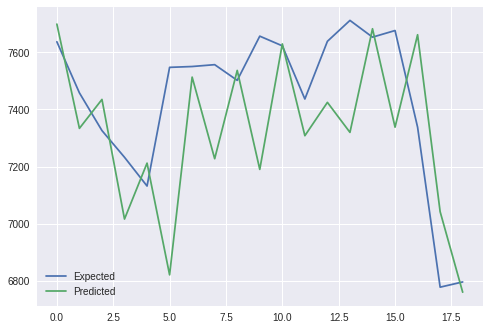

In [83]:

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
  # make one-step forecast
  X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
  yhat = forecast_lstm(lstm_model, 1, X)
  # invert scaling
  yhat = invert_scale(scaler, X, yhat)
  # invert differencing
  yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
  # store forecast
  predictions.append(yhat)
  expected = raw_values[len(train) + i + 1]
  print('Predicted = $%d, Expected = $%d' % (yhat, expected))
  
# report performance
rmse = sqrt(mean_squared_error(raw_values[-len(test_scaled):], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-len(test_scaled):], label = 'Expected')
pyplot.plot(predictions, label = 'Predicted')
pyplot.legend()
pyplot.show()